In [ ]:
# mlp with scaled outputs on the regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers
import pandas as pd


In [ ]:
#!pip install tensorflow==2.4.1
#import tensorflow as tf
print(tf.__version__)
print(np.__version__)


2.8.0
1.21.6


In [ ]:
#Define paths to model files 
import os 
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

In [ ]:
#load the datasheet 
#path='/content/drive/My Drive/Colab Notebooks/downloads/edited_UTC.xlsx'
path = '/content/Dataset_M.xlsx'
df = pd.read_excel(path)

In [ ]:
#data shuffling 
df = df.sample(frac = 1)
print(df)

                     created_at  entry_id  Temperature   Humidity    Pressure  \
563   2021-12-31T09:55:26+05:30      3132        46.28   31.68457  1008.96216   
886   2022-01-16T21:54:47+05:30      4243        25.23  100.00000  1008.32312   
384   2021-09-25T06:03:34+05:30      2296        25.95  100.00000  1003.96930   
1038  2022-01-23T07:07:40+05:30      4726        23.97  100.00000  1006.02313   
1133  2022-01-28T18:47:56+05:30      5047        32.89   63.97852  1004.00049   
...                         ...       ...          ...        ...         ...   
14    2021-08-30T16:58:05+05:30        73        31.43   69.08789  1002.52545   
1104  2022-01-27T14:09:53+05:30      4963        37.36   32.54004  1001.60834   
247   2021-09-13T16:01:50+05:30      1704        33.25   72.08887  1002.75269   
294   2021-09-17T13:00:44+05:30      1936        34.42   66.44043  1002.80908   
606   2022-01-02T21:58:56+05:30      3289        27.33  100.00000  1007.84924   

      Reference_Temp  
563 

In [ ]:
x = df[["Temperature","Humidity","Pressure"]]
y = df["Reference_Temp"]


In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
#create scaler 
scaler = MinMaxScaler(feature_range = (-1,1))
#scaler = MinMaxScaler()

In [ ]:
#DATA PREPROCESSING 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 13)
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [ ]:
#split dataset into train and test 
# datasplitting in the normal way 
nsamples = 1146    # Number of samples to use as a dataset
val_ratio = 0.2     # Percentage of samples that should be held for validation set
test_ratio = 0.3   # Percentage of samples that should be held for test set

# sPlit the dataset into training, validation, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x, [val_split, test_split])
y_val, y_test, y_train = np.split(y, [val_split, test_split])

In [ ]:
tflite_model_name = 'Lanka_model'
c_model_name = 'Lanka_model'

In [ ]:
scaled_x_val = scaler.fit_transform(x_val)
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [ ]:
print(scaled_x_val)

[[ 0.55       -0.7472587   0.72125879]
 [-0.83486842  1.          0.57615714]
 [-0.7875      1.         -0.4124296 ]
 [-0.91776316  1.          0.05391699]
 [-0.33092105  0.07870236 -0.40534754]
 [ 0.29276316 -0.84679158 -0.19265863]
 [-0.60197368  0.9982516   0.71948543]
 [ 0.02960526 -0.62082564  0.84561379]
 [-0.40131579 -0.31533313 -0.66198427]
 [-0.72171053  1.          0.19253375]
 [-0.35921053  0.1058271  -0.5712367 ]
 [-0.45394737  0.26255712 -0.46786449]
 [-0.56973684  0.45942512 -0.25229191]
 [-0.39078947  0.16854412 -0.73786155]
 [-0.02236842 -0.52523918 -0.37061841]
 [ 1.         -0.94909694 -0.35293483]
 [-0.57631579  0.97532292  0.36332746]
 [-0.70657895  1.          0.09344166]
 [-0.19276316  0.15745447 -0.40514091]
 [-0.66644737  0.85660753  0.32277647]
 [-0.18881579 -0.55021601 -0.90779697]
 [-0.525       0.61500625 -0.23857055]
 [-0.79078947  1.          0.58545532]
 [-0.81907895  1.          0.46997163]
 [-0.66513158  0.96780476  0.42473635]
 [-0.82697368  1.        

In [ ]:
#reshaping coz got only 1D array
y_train = np.array([y_train]).reshape(-1,1)
y_test = np.array([y_test]).reshape(-1,1)
y_val = np.array([y_val]).reshape(-1,1)

In [ ]:
scaled_y_train = scaler.fit_transform(y_train)
scaled_y_test = scaler.fit_transform(y_test)
scaled_y_val  = scaler.fit_transform(y_val)

In [ ]:
print(scaled_x_train)

[[-0.78481013  1.         -0.24360983]
 [-0.32511659  0.33789546  0.53936036]
 [-0.59960027  1.          0.61863516]
 ...
 [-0.22518321  0.29392153 -0.59276198]
 [-0.14723518  0.1510308  -0.58150261]
 [-0.61958694  1.          0.42486385]]


In [ ]:
#Sequential model
#define a model 
#model = Sequential()
#model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dense(1, activation='linear'))
# Create a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

#from keras.layers import Dense
#from keras.models import Sequential
#from keras.models import Sequential
#from keras.layers import Dense
from tensorflow.keras import regularizers
from keras.regularizers import l1 
from keras.regularizers import l2
from keras.layers import Activation

model= Sequential([Dense(32,activation='relu',input_shape=[3]),
                        Dense(25,activation='relu', activity_regularizer=l1(0.01)),
                        Dropout(0.2),
                        Dense(25,activation='relu'),
                        Dense(1)
                     ])
#model= Sequential([Dense(50,activation='relu',input_shape=[3]),
 #                       Dense(25,activation='relu'),
  #                      Dropout(0.2),
   #                     Dense(25,activation='relu'),
    #                    Dense(1)
     #                 ])



In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                128       
                                                                 
 dense_13 (Dense)            (None, 25)                825       
                                                                 
 dropout_3 (Dropout)         (None, 25)                0         
                                                                 
 dense_14 (Dense)            (None, 25)                650       
                                                                 
 dense_15 (Dense)            (None, 1)                 26        
                                                                 
Total params: 1,629
Trainable params: 1,629
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model
#model.compile(loss='mae', optimizer= 'rmsprop', metrics = ['mae'])
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])

In [ ]:
#history = model.fit(scaled_x_train, scaled_y_train, validation_data=(scaled_x_val,scaled_y_val), epochs=3000, verbose=0)
history = model.fit(scaled_x_train, scaled_y_train, validation_split = 0.2,  epochs=100, verbose=0)

#Save the model to disk 
model.save(MODEL_TF)

INFO:tensorflow:Assets written to: models/model/assets


INFO:tensorflow:Assets written to: models/model/assets


In [ ]:
history.history

{'loss': [0.10951841622591019,
  0.08706995099782944,
  0.06839323043823242,
  0.05594595521688461,
  0.05105343833565712,
  0.04385905712842941,
  0.04204975813627243,
  0.03933962062001228,
  0.03675318881869316,
  0.0343380831182003,
  0.03085358813405037,
  0.03212931752204895,
  0.028576450422406197,
  0.02753111906349659,
  0.02850363217294216,
  0.028274357318878174,
  0.027066165581345558,
  0.02542315423488617,
  0.025438277050852776,
  0.02469388209283352,
  0.025362370535731316,
  0.024525737389922142,
  0.024340150877833366,
  0.02399858459830284,
  0.02418019250035286,
  0.024389460682868958,
  0.024483080953359604,
  0.0215621180832386,
  0.02268281579017639,
  0.022827856242656708,
  0.02359306812286377,
  0.02265416644513607,
  0.021794695407152176,
  0.02306445688009262,
  0.02300926484167576,
  0.02173556014895439,
  0.022806627675890923,
  0.02297941967844963,
  0.02315904013812542,
  0.02186289243400097,
  0.020749887451529503,
  0.02118789218366146,
  0.02202934958

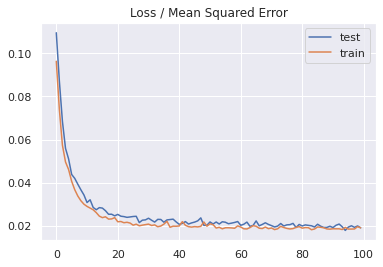

In [ ]:
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='test')
pyplot.plot(history.history['val_loss'], label='train')
pyplot.legend()
pyplot.show()

In [ ]:
pred = model.predict(scaled_x_test).reshape(-1,1)

Text(0, 0.5, 'Predictions')

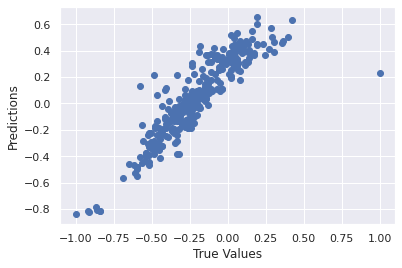

In [ ]:
# Plot predictions against actual values
#predictions = model.predict(scaled_x_test)

#plt.clf()
#plt.title("Comparison of predictions to actual values")
#plt.plot(scaled_x_test, scaled_y_test, 'b.', label='Actual')
#plt.plot(scaled_x_test, pred, 'r.', label='Prediction')
#plt.legend()
#plt.show()

y_pred = model.predict(scaled_x_test)
plt.scatter(scaled_y_test,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [ ]:
prediction = model.predict(scaled_x_test)

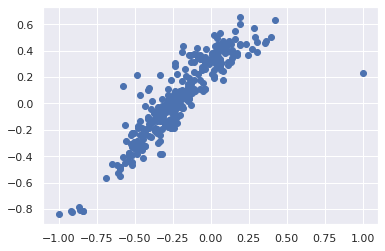

In [ ]:
plt.scatter(scaled_y_test, prediction)

In [ ]:
prediction= np.array([prediction]).reshape(-1,1)

Text(0, 0.5, 'Predictions')

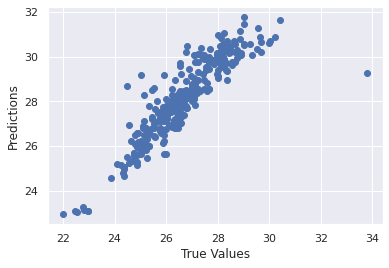

In [ ]:
#Inverse transform 
# inversed = scaler.inverse_transform(scaled)

inv_x_test = scaler.inverse_transform(prediction)
inv_y_test = scaler.inverse_transform(scaled_y_test)
plt.scatter(inv_y_test, inv_x_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [ ]:
print(np.max(inv_x_test))

31.78393


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(scaled_y_test, model.predict(scaled_x_test))
print("the mean squared error (MSE) on test set: {:.4f}".format(mse))

mae = mean_absolute_error(scaled_y_test, model.predict(scaled_x_test))
print("the mean absolute error (MAE) on test set : {:.4f}".format(mae))

rsquared = r2_score(scaled_y_test, model.predict(scaled_x_test))
print("R^2 value on test set : {:.4f}".format(rsquared))

the mean squared error (MSE) on test set: 0.0792
the mean absolute error (MAE) on test set : 0.2553
R^2 value on test set : -0.3102


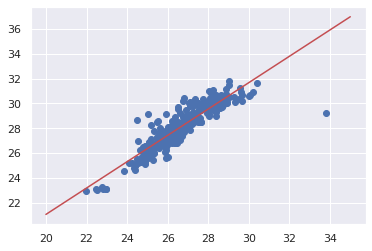

In [ ]:
#using Scikit-Learn's LinearRegression estimator to fit this data and construct the best fit line
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns; sns.set()

model1 = LinearRegression(fit_intercept = True)

model1.fit(inv_y_test, inv_x_test)
xfit = np.linspace(20,35,1000)
yfit = model1.predict(xfit[:,np.newaxis])

plt.scatter(inv_y_test, inv_x_test)
plt.plot(xfit, yfit,'r')

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
#%tensorflow_version 2.x

Post Training Qunatization

In [ ]:
#Generate a TensorFlow Lite Model 

#Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
#converter.optimizations = [tf.lite.Optimize.DEFAULT]
#converter.target_spec.supported_types = [tf.float32]
model_no_quant_tflite = converter.convert()


# Save the model to disk
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)




8564

In [ ]:
#Generate a TensorFlow Lite for Microcontrollers Model 
# Install xxd if it is not available
!apt-get update && apt-get -qq install xxd
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_NO_QUANT_TFLITE} > {MODEL_TFLITE_MICRO}
# Update variable names
REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_TFLITE_MICRO}

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done


In [ ]:
# Print the C source file
!cat {MODEL_TFLITE_MICRO}

unsigned char models_model_no_quant_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x18, 0x00, 0x1c, 0x00, 0x14, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x18, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x38, 0x01, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0xe0, 0x00, 0x00, 0x00, 0x54, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x3c, 0x04, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x40, 0x01, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x20, 0x21, 0x00, 0x00,
  0x1c, 0x21, 0x00, 0x00, 0x50, 0x20, 0x00, 0x00, 0x9c, 0x1f, 0x00, 0x00,
  0xf4, 0x1e, 0x00, 0x00, 0x30, 0x1e, 0x00, 0x00, 0x58, 0x1c, 0x00, 0x00,
  0x80, 0x0f, 0x00, 0x00, 0x64, 0x05, 0x00, 0x00, 0xa8, 0x04, 0x00, 0x00,
  0xf8, 0x20, 0x00, 0x00, 0xf4, 0x20, 0x00, 0x00, 0xf0, 0x20, 0x00, 0x00,
  0xec, 0x20, 0x00, 0x00, 0xc0, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0a, 0x00, 0x10, 0x00, 0